# <center> Interpolación de Lagrange <center>

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Ejemplo 3 puntos

In [2]:
#Hacemos la interpolación con tres puntos de la tabla
#(205,1724.3);(210,1907.7);(215,2105.9)
X=np.array([205,210,215])
Y=np.array([1724.3,1907.7,2105.9])


In [3]:
datos=pd.read_csv("vapor_Saturado.csv",delimiter=",")
print(datos)
X=datos['T(°C)']

   T(°C)  P_sat(kPa)  v_f(m^3/kg)  v_g(m^3/kg)
0    205      1724.3     0.000116      0.11508
1    210      1907.7     0.001173      0.10429
2    215      2105.9     0.001180      0.09468


## Formula para los coeficientes de interpolación:
x: Punto a interpolar ; n: número de puntos-1
    $$ L_{i}(x)=\Pi_{j=0,j\neq i}^{n}\frac{(x-x_{j})}{(x_{i}-x_{j})} $$ $ i=0,...,n$
$$ p(x)=\sum_{i=0}^{n}y_{i}*L_{i}(x)$$ 

In [4]:
#Coeficientes de p(x
#x: punto a interpolar
#X: datos en x, Y datos en y
def L0(x,X):#i=0, j=1,2
    return (x-X[1])*(x-X[2])/((X[0]-X[1])*(X[0]-X[2]))
def L1(x,X):#i=1,j=0,2
    return (x-X[0])*(x-X[2])/((X[1]-X[0])*(X[1]-X[2]))
def L2(x,X):#i=1,j=0,1
    return (x-X[0])*(x-X[1])/((X[2]-X[0])*(X[2]-X[1]))

In [5]:
#sumatoria para el polinomio
def p_lagrange(x,X,Y):
    return L0(x,X)*Y[0]+L1(x,X)*Y[1]+L2(x,X)*Y[2]

In [6]:
x=207.5#K; valor a interpolar
p_lagrange(x,X,Y)

1814.1499999999999

In [7]:
import sympy as sy

In [8]:
x=sy.symbols('x')

In [9]:
L0(x,X)

(x - 215)*(x - 210)/50

In [10]:
print(L1(x,X))

-(x - 215)*(x - 205)/25


In [11]:
print(L2(x,X))

(x - 210)*(x - 205)/50


In [12]:
print(p_lagrange(x,X,Y))

34.486*(x - 215)*(x - 210) - 76.308*(x - 215)*(x - 205) + 42.118*(x - 210)*(x - 205)


In [13]:
sy.expand(p_lagrange(x,X,Y))

0.295999999999992*x**2 - 86.1599999999962*x + 6947.69999999972

## 2. Interpolación de P vs T  y generalización programa Lagrange

In [179]:
#base del polinomio L_i
def L(i,x,X,n):#i=0, j=1,2
    prod=1
    for j in range(n):
        if(i!=j):
            prod*=(x-X[j])/(X[i]-X[j])
    return prod
#Calculo de los polinomios haciendo una sumatoria de los productos L_iy_i
def p_lagrange(x,X,Y):
    n=len(X)
    suma=0
    for i in range(n):
#         print(type(L(i,x,X,n)))
#         print(type(Y[i]))
        suma+=L(i,x,X,n)*Y[i]
    return suma

In [202]:
datos=pd.read_csv("thermodynamical_tables_water.csv",delimiter="\t",header=[0,1,2])
datos

,Temp. (°C),Sat. press. (kPa),Specific volume (m3/kg),Unnamed: 3_level_0,Internal energy (kJ/kg),Unnamed: 5_level_0,Unnamed: 6_level_0,Enthalpy (kJ/kg),Unnamed: 8_level_0,Unnamed: 9_level_0,Entropy (kJ/kg·K),Unnamed: 11_level_0,Unnamed: 12_level_0
,Temp.,Sat. press.,Sat. liquid.,Sat.vapor.,Sat. liquid.,Evap.,Sat.vapor.,Sat. liquid.,Evap.,Sat.vapor.,Sat. liquid.,Evap.,Sat.vapor.
,T,Psat,v_f,v_g,u_f,u_fg,u_g,h_f,h_fg,h_g,s_f,s_fg,s_g
0,0.01,0.6117,0.001000,206.000000,0.000,2374.9,2374.90,0.001,2500.9,2500.9,0.0000,9.1556,9.1556
1,5.00,0.8725,0.001000,147.030000,21.019,2360.8,2381.80,21.020,2489.1,2510.1,0.0763,8.9487,9.0249
2,10.00,1.2281,0.001000,106.220000,42.020,2346.6,238.87,42.022,2477.2,2519.2,0.1511,8.7488,8.8999
3,15.00,1.7057,0.001001,77.885000,62.980,2332.5,2395.50,62.982,2465.4,2528.3,0.2245,8.5559,8.7803
4,20.00,2.3392,0.001002,57.762000,83.913,2318.4,2402.30,83.915,2453.5,2537.4,0.2965,8.3696,8.6661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,355.00,17570.0000,0.001808,0.007872,1682.200,706.4,2388.60,1714.000,812.9,2526.9,3.8442,1.2942,5.1384
72,360.00,18666.0000,0.001895,0.006950,1726.200,625.7,2351.90,1761.500,720.1,2481.6,3.9165,1.1373,5.0537


Opcional: Modificamos los indices para que queden los multiíndices de forma adecuada

In [203]:
a=[x[j] for x in datos.columns for j in range(3)]
a=np.reshape(a,[int(len(a)/3),3])
a[3][0]=a[2][0]
a[5][0]=a[4][0]
a[6][0]=a[4][0]
a[8][0]=a[7][0]
a[9][0]=a[7][0]
a[11][0]=a[10][0]
a[12][0]=a[10][0]
a=[tuple(a[i]) for i in range(len(a))]
col_names =pd.MultiIndex.from_tuples(a)
datos.columns=col_names

In [204]:
datos

Temp. (°C) Sat. press. (kPa) Specific volume  (m3/kg)              \
        Temp.       Sat. press.             Sat. liquid.  Sat.vapor.   
            T              Psat                      v_f         v_g   
0        0.01            0.6117                 0.001000  206.000000   
1        5.00            0.8725                 0.001000  147.030000   
2       10.00            1.2281                 0.001000  106.220000   
3       15.00            1.7057                 0.001001   77.885000   
4       20.00            2.3392                 0.001002   57.762000   
..        ...               ...                      ...         ...   
71     355.00        17570.0000                 0.001808    0.007872   
72     360.00        18666.0000                 0.001895    0.006950   
73     365.00        19822.0000                 0.002015    0.006009   
74     370.00        21044.0000                 0.002217    0.004953   
75     373.95        22064.0000                 0.003106    0.003106   

   Internal energy  (kJ/kg)                    Enthalpy  (kJ/kg)          \
               Sat. liquid.   Evap. Sat.vapor.      Sat. liquid.   Evap.   
                        u_f    u_fg        u_g               h_f    h_fg   
0                     0.000  2374.9    2374.90             0.001  2500.9   
1                    21.019  2360.8    2381.80            21.020  2489.1   
2                    42.020  2346.6     238.87            42.022  2477.2   
3                    62.980  2332.5    2395.50            62.982  2465.4   
4                    83.913  2318.4    2402.30            83.915  2453.5   
..                      ...     ...        ...               ...     ...   
71                 1682.200   706.4    2388.60          1714.000   812.9   
72                 1726.200   625.7    2351.90          1761.500   720.1   
73                 1777.200   526.4    2303.60          1817.200   605.5   
74                 1844.500   385.6    2230.10          1891.200   443.1   
75                 2015.700     0.0    2015.70          2084.300     0.0   

              Entropy  (kJ/kg·K)                     
   Sat.vapor.       Sat. liquid.   Evap. Sat.vapor.  
          h_g                s_f    s_fg        s_g  
0      2500.9             0.0000  9.1556     9.1556  
1      2510.1             0.0763  8.9487     9.0249  
2      2519.2             0.1511  8.7488     8.8999  
3      2528.3             0.2245  8.5559     8.7803  
4      2537.4             0.2965  8.3696     8.6661  
..        ...                ...     ...        ...  
71     2526.9             3.8442  1.2942     5.1384  
72     2481.6             3.9165  1.1373     5.0537  
73     2422.7             4.0004  0.9489     4.9493  
74     2334.3             4.1119  0.6890     4.8009  
75     2084.3             4.4070  0.0000     4.4070  

[76 rows x 13 columns]

In [205]:
T=datos["Temp. (°C)"]["Temp."]["T"]
P=datos["Sat. press. (kPa)"]["Sat. press."]["Psat"]
T_inter=np.linspace(7.5,372.5,74)

In [206]:
P_pred=p_lagrange(T_inter,T,P)#[p_lagrange(t,T,P) for t in T_inter]

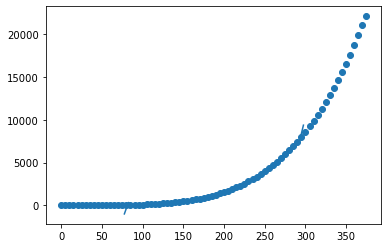

In [214]:
plt.plot(T_inter[14:-15],P_pred[14:-15])
plt.scatter(T,P)

In [208]:
P-P_pred

array([-5.81305469e+15,  2.03393161e+14, -1.01054933e+13,  6.55051723e+11,
       -5.26777694e+10,  5.08316375e+09, -5.74795848e+08,  7.48341078e+07,
       -1.10653959e+07,  1.83829720e+06, -3.40091325e+05,  6.95946653e+04,
       -1.56119330e+04,  3.87876895e+03, -9.85671899e+02,  3.50853932e+02,
       -2.98303809e+01,  1.08766814e+02,  8.11907239e+01,  1.15296544e+02,
        1.29868583e+02,  1.56681579e+02,  1.83040211e+02,  2.15119047e+02,
        2.50558322e+02,  2.91174884e+02,  3.36633372e+02,  3.87872214e+02,
        4.45077937e+02,  5.08948932e+02,  5.79886850e+02,  6.58560961e+02,
        7.45436059e+02,  8.41218409e+02,  9.46420658e+02,  1.06181484e+03,
        1.18791994e+03,  1.32546840e+03,  1.47524667e+03,  1.63788482e+03,
        1.81420997e+03,  2.00489445e+03,  2.21077606e+03,  2.43252219e+03,
        2.67120965e+03,  2.92750660e+03,  3.20243207e+03,  3.49648783e+03,
        3.81116730e+03,  4.14655204e+03,  4.50513965e+03,  4.88488402e+03,
        5.29300175e+03,  